#### porting of Talas_CHIRPS_precip (JS: https://code.earthengine.google.com/15a12d851e07153093c412953db1196b)

In [1]:
%matplotlib inline

In [2]:
import ee
ee.Initialize()

Then we import in other Python packages we need.

In [3]:
import datetime
from matplotlib import dates
import matplotlib.dates as mdates
from pylab import *

In [4]:
xBand = 'time'
yBand = 'precipitation'

next we define datasets:

In [7]:
CHIRPS = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD') 
# https://explorer.earthengine.google.com/#detail/UCSB-CHG%2FCHIRPS%2FPENTAD
# print CHIRPS.getInfo()
info = CHIRPS.getInfo()
print(info)
# ee.ImageCollection.getInfo?

{u'features': [{u'bands': [{u'crs': u'EPSG:4326', u'crs_transform': [0.05000000074505806, 0.0, -180.0, 0.0, -0.05000000074505806, 50.0], u'id': u'precipitation', u'data_type': {u'type': u'PixelType', u'precision': u'float'}, u'dimensions': [7200, 2000]}], u'version': 1493666503349000, u'type': u'Image', u'id': u'UCSB-CHG/CHIRPS/PENTAD/19810101', u'properties': {u'system:time_end': 347587200000, u'system:index': u'19810101', u'system:asset_size': 18562032, u'month': 1.0, u'system:time_start': 347155200000, u'year': 1981.0, u'system:footprint': {u'type': u'LinearRing', u'coordinates': [[-180.0, 50.0], [-180.0, -50.0], [180.0, -50.0], [180.0, 50.0], [-180.0, 50.0]]}, u'pentad': 1.0}}, {u'bands': [{u'crs': u'EPSG:4326', u'crs_transform': [0.05000000074505806, 0.0, -180.0, 0.0, -0.05000000074505806, 50.0], u'id': u'precipitation', u'data_type': {u'type': u'PixelType', u'precision': u'float'}, u'dimensions': [7200, 2000]}], u'version': 1493666503460000, u'type': u'Image', u'id': u'UCSB-CHG/C

In [20]:
lewa = ee.FeatureCollection('ft:1yrKHIrC4bnbgAP3l_ZCSm_0B_BCrI_hCm6p-RXnc')
lewaInfo = lewa.getInfo

Define time filter for image collection:

In [21]:
startTime = datetime.datetime(1999, 1, 1)
endTime = datetime.datetime(2016, 12, 31)

precip = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD').filterDate(startTime, endTime).select('precipitation')
print(precip.first()) #get metadata from first element from Image Collection

ee.Element({
  "type": "Invocation", 
  "arguments": {
    "collection": {
      "type": "Invocation", 
      "arguments": {
        "baseAlgorithm": {
          "body": {
            "type": "Invocation", 
            "arguments": {
              "bandSelectors": [
                "precipitation"
              ], 
              "input": {
                "type": "ArgumentRef", 
                "value": "_MAPPING_VAR_0_0"
              }
            }, 
            "functionName": "Image.select"
          }, 
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ], 
          "type": "Function"
        }, 
        "collection": {
          "type": "Invocation", 
          "arguments": {
            "filter": {
              "type": "Invocation", 
              "arguments": {
                "rightField": "system:time_start", 
                "leftValue": {
                  "type": "Invocation", 
                  "arguments": {
                    "start": {
          

In [22]:
print(startTime)

1999-01-01 00:00:00


In [23]:
print(endTime)

2016-12-31 00:00:00


In [24]:
datetime.datetime?

Separate the information into column headers and data

In [25]:
point = {'type':'Point', 'coordinates':[ -116.88629,36.56122]};  # death valley (should be stable)
info = precip.getRegion(point,500).getInfo()
print(info)

[[u'id', u'longitude', u'latitude', u'time', u'precipitation'], [u'19990101', -116.88653898142185, 36.55918627545423, 915148800000, 0.6627400517463684], [u'19990106', -116.88653898142185, 36.55918627545423, 915580800000, 0.4719476103782654], [u'19990111', -116.88653898142185, 36.55918627545423, 916012800000, 0.9479055404663086], [u'19990116', -116.88653898142185, 36.55918627545423, 916444800000, 0.6254568099975586], [u'19990121', -116.88653898142185, 36.55918627545423, 916876800000, 2.0774643421173096], [u'19990126', -116.88653898142185, 36.55918627545423, 917308800000, 1.202812671661377], [u'19990201', -116.88653898142185, 36.55918627545423, 917827200000, 1.2181549072265625], [u'19990206', -116.88653898142185, 36.55918627545423, 918259200000, 2.172900676727295], [u'19990211', -116.88653898142185, 36.55918627545423, 918691200000, 0.3882034122943878], [u'19990216', -116.88653898142185, 36.55918627545423, 919123200000, 1.0972319841384888], [u'19990221', -116.88653898142185, 36.5591862754

In [26]:
ee.ImageCollection.getRegion?
lewaRegionInfo = precip.getRegion(lewa, 1000, "EPSG:4326") #.getInfo()
print(lewaRegionInfo)

ee.List({
  "type": "Invocation", 
  "arguments": {
    "geometry": {
      "type": "Invocation", 
      "arguments": {
        "collection": {
          "type": "Invocation", 
          "arguments": {
            "tableId": "ft:1yrKHIrC4bnbgAP3l_ZCSm_0B_BCrI_hCm6p-RXnc"
          }, 
          "functionName": "Collection.loadTable"
        }
      }, 
      "functionName": "Collection.geometry"
    }, 
    "crs": {
      "type": "Invocation", 
      "arguments": {
        "crs": "EPSG:4326"
      }, 
      "functionName": "Projection"
    }, 
    "scale": 1000, 
    "collection": {
      "type": "Invocation", 
      "arguments": {
        "baseAlgorithm": {
          "body": {
            "type": "Invocation", 
            "arguments": {
              "bandSelectors": [
                "precipitation"
              ], 
              "input": {
                "type": "ArgumentRef", 
                "value": "_MAPPING_VAR_0_0"
              }
            }, 
            "functionName":

We separate the information returned into column headers and data.

In [27]:
# extract the header column names
header = info[0]
# create a Numpy array of the data
data = array(info[1:])

Next we extract time information and convert it to at Python datatime data type.

Extract data columns that you want to display on the plot:

In [28]:
iBands = [header.index(yBand)] #yBandList
yData = data[0:,iBands].astype(np.float)

And we use matplotlib to plot values

NameError: name 'time' is not defined

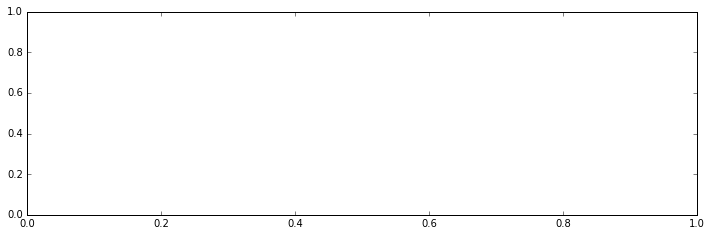

In [31]:
# matplotlib date format object
fig = figure(figsize=(12,8), dpi=80)

# plot the band values
ax1 = fig.add_subplot(211)
ax1.plot(time, yData[:], '+', color="red", label="Death Valley")
# ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax1.legend(loc='best')
ax1.grid(True)

plt.title('Precip values as a function of time')
ax1.set_ylabel('Band Values')

### Now initiate precip values for Lewa

In [32]:
# deathvalley = {'type':'Point', 'coordinates':[ -116.88629,36.56122]};  # death valley (should be stable)
# dv_info = precip.getRegion(deathvalley,500).getInfo()

In [33]:
lewa = {'type':'Point', 'coordinates':[ 37.4, 0.2]};  # lewa valley (should be stable)
lewa_info = precip.getRegion(lewa,500).getInfo()

In [34]:
# lewa = ee.Geometry.Rectangle(33, -0.2, 34, 0.2)
# lewa_info = precip.getRegion(lewa,500).getInfo()

We separate the information returned into column headers and data.

In [35]:
# extract the header column names
header = lewa_info[0]
# create a Numpy array of the data
data = array(lewa_info[1:])

Next we extract time information and convert it to at Python datatime data type.

In [36]:
# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]
# print(time)[:10]

Print first 10 asset timestamps

In [37]:
for i in time[:10]:
    print(i)

1999-01-01 00:00:00
1999-01-06 00:00:00
1999-01-11 00:00:00
1999-01-16 00:00:00
1999-01-21 00:00:00
1999-01-26 00:00:00
1999-02-01 00:00:00
1999-02-06 00:00:00
1999-02-11 00:00:00
1999-02-16 00:00:00


Extract data columns that you want to display on the plot:

In [38]:
iBands = [header.index(yBand)] #yBandList
yData = data[0:,iBands].astype(np.float)

In [39]:
for i in iBands:
    print i

4


And we use matplotlib to plot values

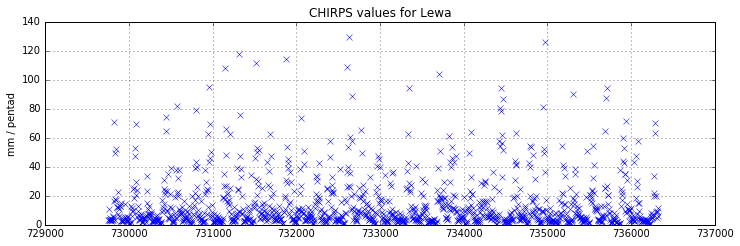

In [40]:
# matplotlib date format object
fig = figure(figsize=(12,8), dpi=80)

# plot the band values
ax2 = fig.add_subplot(211, sharex=ax1)
ax2.plot(time, yData[:], 'x', color="blue", label="Lewa")
# ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax2.grid(True)
start, end = ax2.get_xlim()

plt.title('CHIRPS values for Lewa')
ax2.set_ylabel('mm / pentad')

In [41]:
type(yData)
# type(ax2)
# y = yData[ax2].resample('MS').mean()

numpy.ndarray

In [42]:
yData.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [43]:
# Convert the timestamp to a numpy array
t = np.array([i.toordinal() for i in time])
t

array([729755, 729760, 729765, ..., 736314, 736319, 736324])

In [44]:
A = array([ t, ones(len(t))]).transpose()
# print(A)
b = precip     # could be NDVI
# print(b)
x = linalg.lstsq(A,b)[0] # obtaining the parameters
# # x = linalg.lstsq(A,b)[0] # obtaining the parameters
x

LinAlgError: 0-dimensional array given. Array must be two-dimensional

In [ ]:
b_hat = A.dot(x)

In [ ]:
fig2 = figure(figsize=(12,4), dpi=80)
plot(time,b_hat.transpose(),'r-',t,b,'o')
fig2.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig2.autofmt_xdate()

Create sequence lists (years, months, etc) for aggregations

Each asset spans a pentad. Each of first 5 pentads in a month have 5 days. The last pentad contains all the days from the 26th to the end of the month.

#### Calculate P for each year

In [ ]:
## JS function
# var YearlyChirps =  ee.ImageCollection.fromImages(
#   years.map(function (y) {
#     var w = precip.filter(ee.Filter.calendarRange(y, y, 'year'))
#              .sum();
#     return w.set('year', y)
#              .set('system:time_start',ee.Date.fromYMD(y,1,1))
#              .set('date', ee.Date.fromYMD(y,1,1));
# }).flatten());

Calculate monthly filter

In [ ]:
months = ee.List.sequence(1,12)
m = ee.Filter.calendarRange(months, months, 'months')
# m = precip.filter(ee.Filter.calendarRange(months, months, 'months')).sum()
# print(months)
print(m)

Calculate annual filter

In [ ]:
years = ee.List.sequence(1999,2016)
y = ee.Filter.calendarRange(years, years, 'year')
# y = precip.filter(ee.Filter.calendarRange(years, years, 'year')).sum()
print(y)

#### List values of assets

In [ ]:
months = {'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'June', '7':'July', '8':'Aug', '9':'Sept', '10':'Oct', '11':'Nov', '12':'Dec'}

In [ ]:
for m in enumerate(months):
    print m
    print m[1]

In [ ]:
## build function which builds monthly cumulative image stack
def build_monthly(p):
    'Jan' = asset[1:6]
    'Feb' = asset[1:6]
    precip = 0
    while p < 6:
        precip += precip
        

In [ ]:
w = precip.filter(y.sum(), m.sum())

In [ ]:
y = w.set('year', y).set('system:time_start',ee.Date.fromYMD(y,1,1)).set('date', ee.Date.fromYMD(y,1,1)).flatten()

In [ ]:
YearlyChirps =  ee.ImageCollection.fromImages(
  years.map(function (y) {

def cumulative_chirps(y): ## start here
    return img.reduceRegions(xxxx, ee.Reducer.mean().forEachBand(img,200))
            var w = precip.filter(ee.Filter.calendarRange(y, y, 'year'))
             .sum();
    return w.set('year', y)
             .set('system:time_start',ee.Date.fromYMD(y,1,1))
             .set('date', ee.Date.fromYMD(y,1,1));
}).flatten());

#### Calculate P for each month

In [ ]:
# var MonthlyChirps =  ee.ImageCollection.fromImages(
#   years.map(function (y) {
#   return months.map(function(m){
#     var w = precip.filter(ee.Filter.calendarRange(y, y, 'year'))
#              .filter(ee.Filter.calendarRange(m, m, 'month'))
#              .sum();
#     return w.set('year', y)
#              .set('month', m)
#              .set('system:time_start',ee.Date.fromYMD(y,m,1))
#              .set('date', ee.Date.fromYMD(y,m,1));
# });
# }).flatten());

In [ ]:
y = months.map(m)

In [ ]:
monthlyChirps = ee.ImageCollection.fromImages(
  years.map(y), months.map(m)
    {w = precip.filter(ee.Filter.calendarRange(y, y, 'year'))
             .filter(ee.Filter.calendarRange(m, m, 'month'))
             .sum();
    return w.set('year', y)
             .set('month', m)
             .set('system:time_start',ee.Date.fromYMD(y,m,1))
             .set('date', ee.Date.fromYMD(y,m,1));
})
}).flatten())